# Credit Account Default Status and Characteristics

Data source: https://www.kaggle.com/datasets/mishra5001/credit-card?datasetId=263888&select=application_data.csv (select all columns when downloading)

Detailed data and columns description and also be found using this link, under Data and Data Explorer-columns_description.csv

In general, credit history and other features are important indicators for companies when determining whether or not to give a potential customer a loan. We recognize in the general the inherent biases in society that contribute to particular groups not being able to have the set criteria to take out a loan. This issue has continued to contribute to racism and classism within the United States. Our analysis and exploration of this credit account default data is merely an exercise to understand the characteristics of those that default and by no means intend to offend specific groups as this is just one data set that is not representative of the entire country. 

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import hw7_tools.plot_tools as pt
from IPython.display import Image

warnings.filterwarnings("ignore")

**Important Note:** Original data can be downloaded with the link provided above and our repo does not contain the original raw dataset due to its size(>100mb) exceeding GitHub's limit. Instead, we uploaded in our repo a slightly cleaned, serialized version of the data, but you can download the original dataset locally and check by uncommenting the code that we used to clean and serialize our data in ``details.ipynb``.

## Data Cleaning and Serialization

In [2]:
fname = 'null_index.npy'
b = np.load(fname)
print(b)

['COMMONAREA_MEDI' 'COMMONAREA_AVG' 'COMMONAREA_MODE'
 'NONLIVINGAPARTMENTS_MODE' 'NONLIVINGAPARTMENTS_AVG'
 'NONLIVINGAPARTMENTS_MEDI' 'FONDKAPREMONT_MODE' 'LIVINGAPARTMENTS_MODE'
 'LIVINGAPARTMENTS_AVG' 'LIVINGAPARTMENTS_MEDI' 'FLOORSMIN_AVG'
 'FLOORSMIN_MODE' 'FLOORSMIN_MEDI' 'YEARS_BUILD_MEDI' 'YEARS_BUILD_MODE'
 'YEARS_BUILD_AVG' 'OWN_CAR_AGE' 'LANDAREA_MEDI' 'LANDAREA_MODE'
 'LANDAREA_AVG' 'BASEMENTAREA_MEDI' 'BASEMENTAREA_AVG' 'BASEMENTAREA_MODE'
 'EXT_SOURCE_1' 'NONLIVINGAREA_MODE' 'NONLIVINGAREA_AVG'
 'NONLIVINGAREA_MEDI' 'ELEVATORS_MEDI' 'ELEVATORS_AVG' 'ELEVATORS_MODE'
 'WALLSMATERIAL_MODE' 'APARTMENTS_MEDI' 'APARTMENTS_AVG' 'APARTMENTS_MODE'
 'ENTRANCES_MEDI' 'ENTRANCES_AVG' 'ENTRANCES_MODE' 'LIVINGAREA_AVG'
 'LIVINGAREA_MODE' 'LIVINGAREA_MEDI' 'HOUSETYPE_MODE']


After some initial exploration of our data, we can check that all the above columns contain more than 50% in our case of nulls values, and here we make one of our major assumptions in this EDA that these missing data are simply unknown and can introduce bias which can affect our analysis(as opposed to them being actually informative and revealing something in our data). Future work might involve taking a deeper look into these columns, but for now, with this assumption in mind, we will drop these columns together with some additional columns like ID number, which we expect to be not useful in our analysis:

In [3]:
df = pd.read_feather("data/serialized.fth") # read cleaned, serialized data
df.head()

,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,...,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,No,Laborers,0.139376,...,1,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working
1,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,No,Core staff,NaN,...,1,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Laborers,0.729567,...,1,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Laborers,NaN,...,1,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Core staff,NaN,...,1,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working


## EDA

In the following parts of our analysis, we will identify some interesting findings in our data and attempt to build a logistic regression model to predict whether a customer will default or not. But for now, let us explore the different variables in our datasets.

First, we look at the overall rough distribution of several features we are initially interested in through boxplots:

### Data Intuition

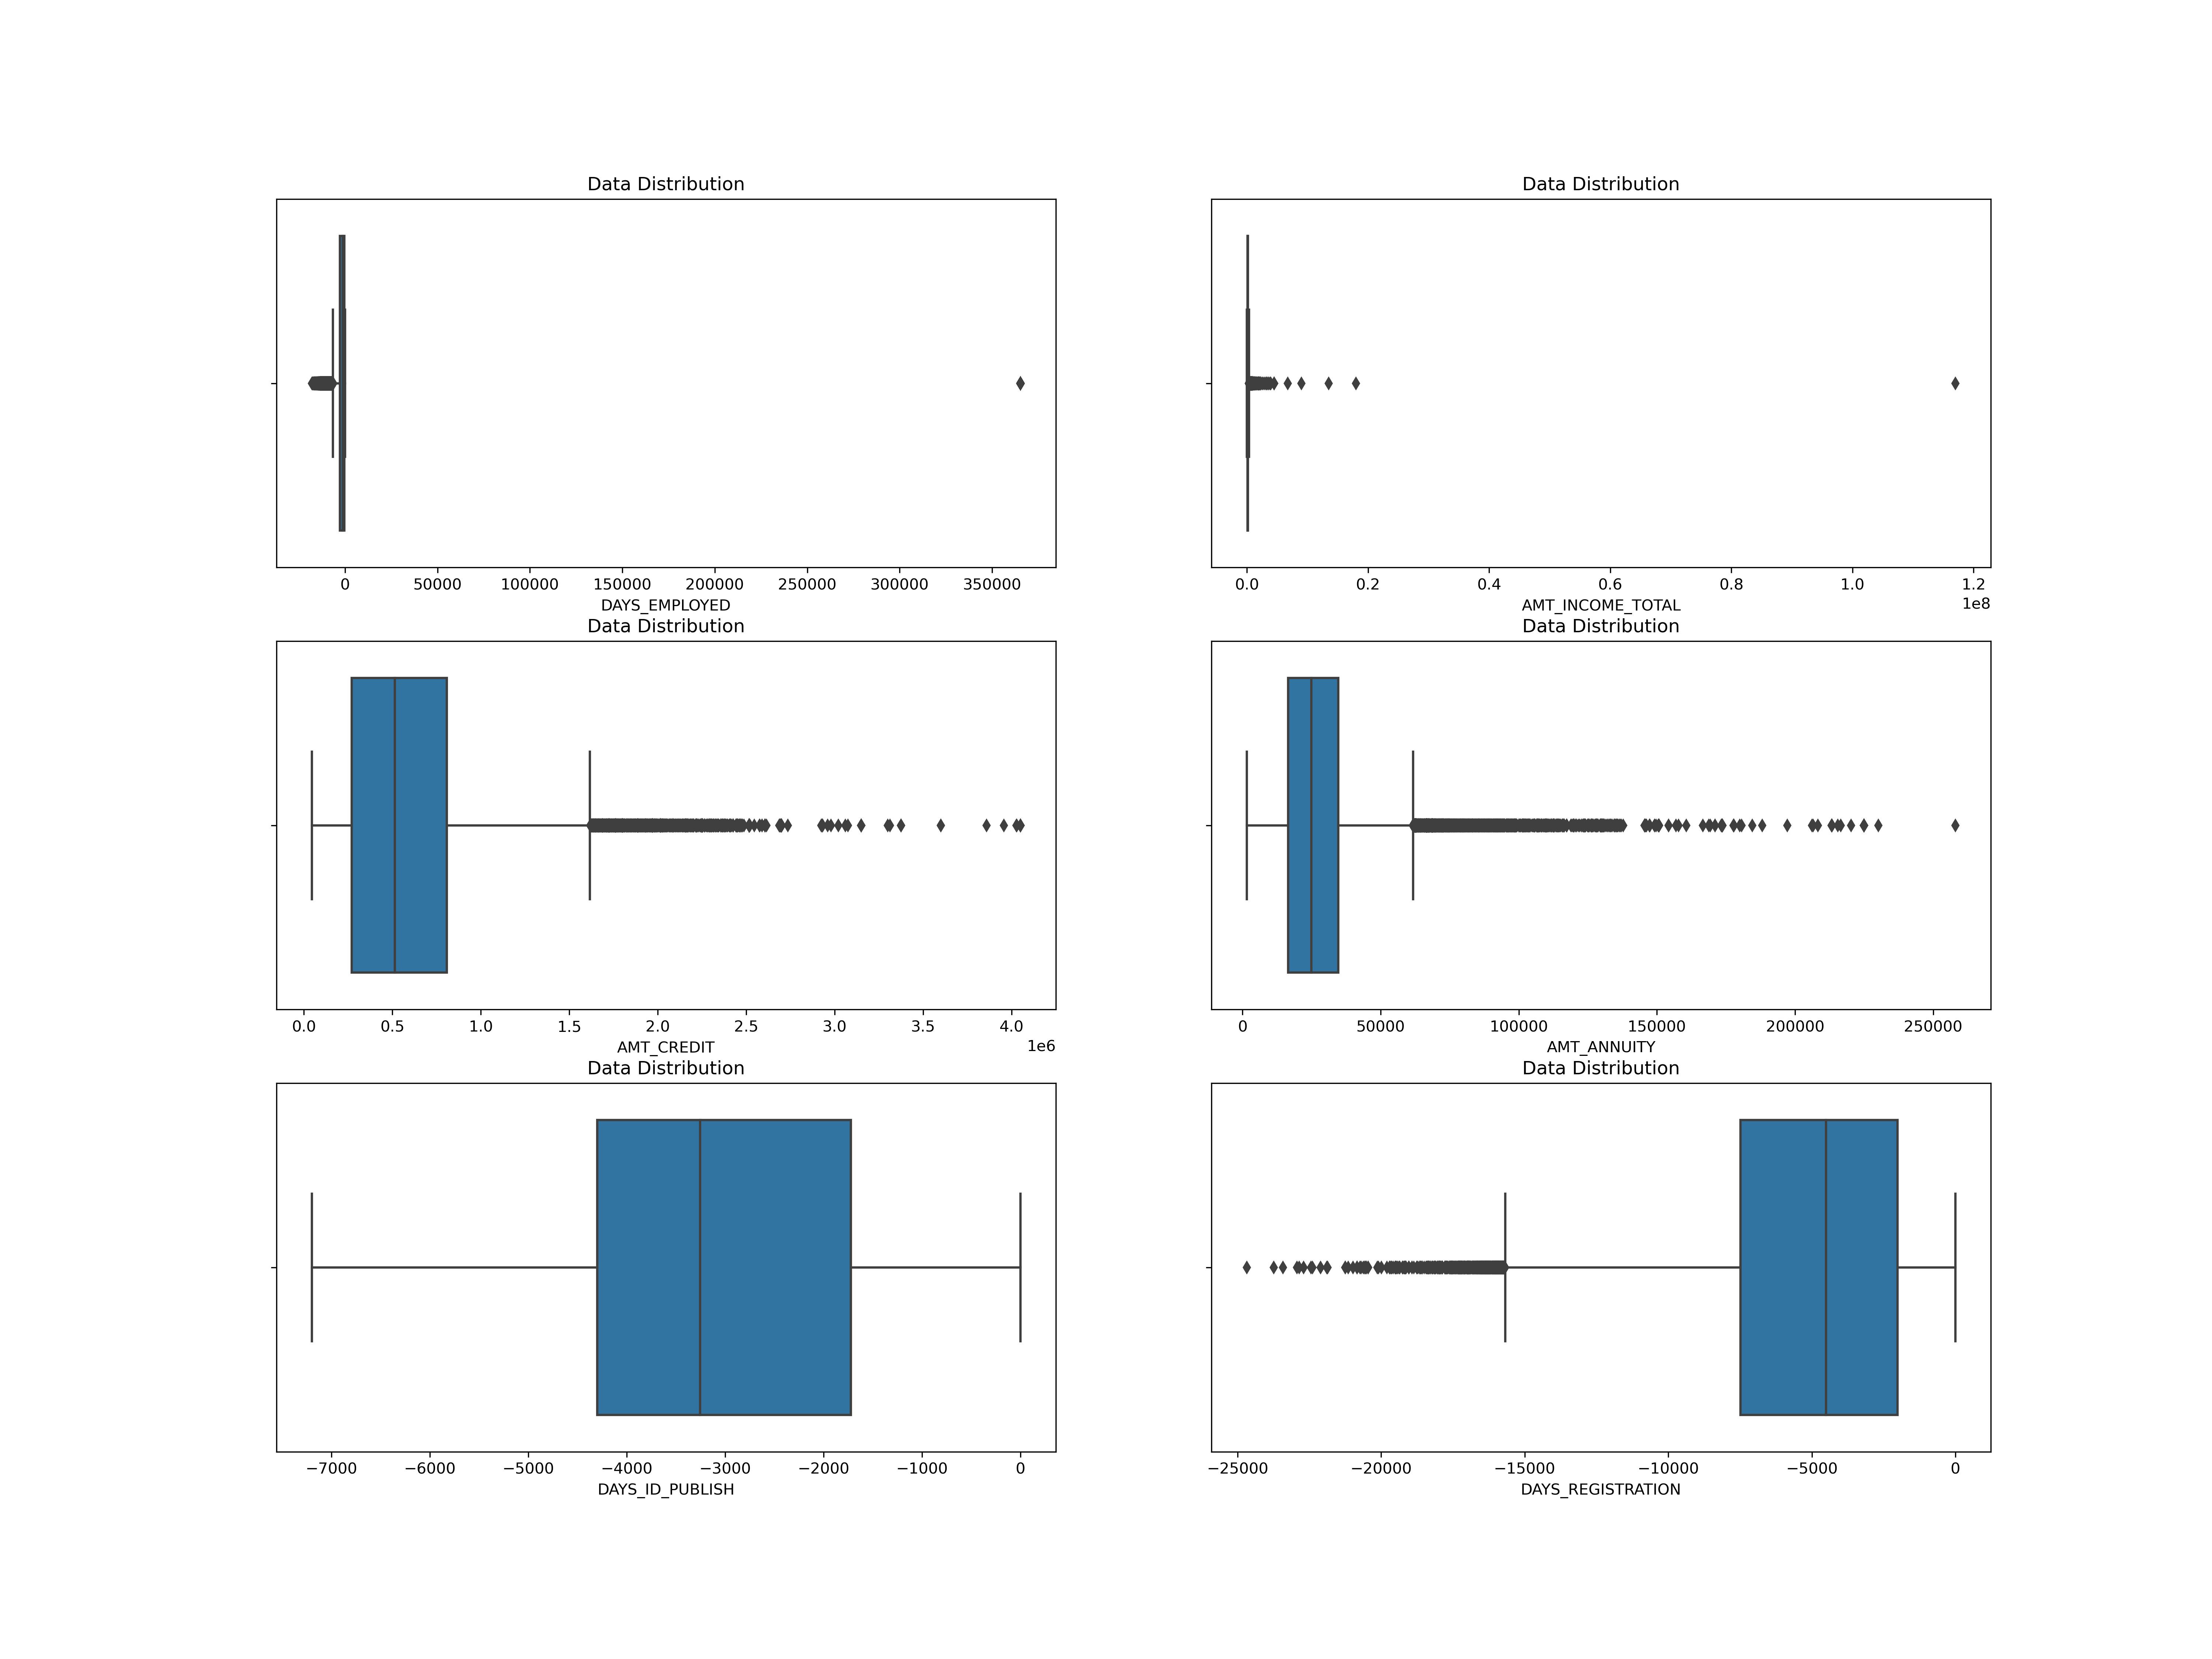

In [4]:
Image("output/feature_plot.png")

While some of the distributions look reasonable, we also observe that there are obviously some strange outliers, for example in the case of days employed, there is a single point who is employed for 350000+ days, and in the AMT_TOTAL_INCOME plot, we also see a client with 100 million in income! This plot is for our initial exploratory purpose only and it perfectly illustrates one important characteristic of our dataset which is that there are errors/extreme individuals, and they might require a closer examination if we plan to use them in further analysis. 

In our case, since we plan to be using AMT_TOTAL_INCOME, we try to take into account of this issue of having extreme/unreliable values by looking at quantiles instead to minimize the impact of such outliers.

### Target

Next, we then proceed to looking at the general picture of what is the proportion of people using credit cards who are able to pay on time vs those who failed to pay on time("TARGET" column).

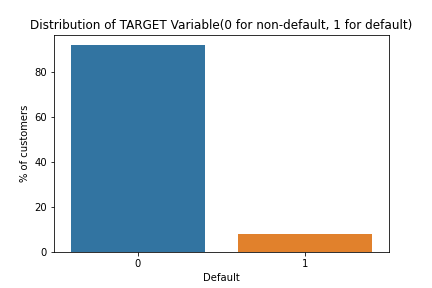

In [5]:
Image("output/target_plot.png")

Notice that there the original data has a high class imbalance, so we might want to bear this fact in mind when performing logistic regression and considering the metrics to look at when evaluating classifiers later. 

## Ratio of Default vs Non-Default for different groups


We will now examine the ratio of defaulters vs non-defaulters between some other categorical variables' groups 

### Gender

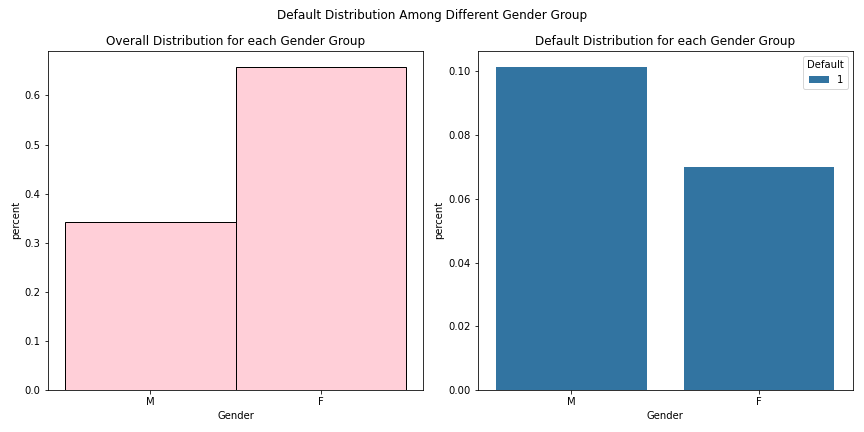

In [6]:
Image("output/Gender.png")

**Observations:** 
* Males seem to have a slightly higher proportion of defaults compared to female

#### Gender and Income

To further investigate the relationship between default risk and gender, we will manually divide income into 5 groups by percentile ranking and see how gender and default rate varies between these different income groups:

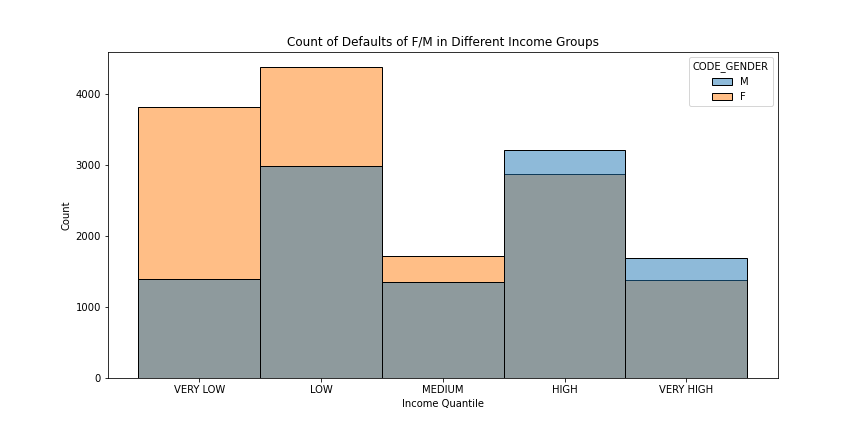

In [7]:
Image("output/gender_income_plot.png")

This might be surprising, but we observe that females have an overall higher count of defaults, and in the occasions where males have a higher default count in the higher income groups, they only "win" by a slight amount. This is opposite to what we observed in the previous section, where males were observed to have a slightly higher proportion of defaults compared to female. The reason is that, if you remembered, there are almost **double the amount of female entries vs male entries** in our original dataset!

Given the class imbalance in gender, we created a plotting function that generates the proportion of defaults of each gender, accounted for the different total counts in gender, and now this new proportion plot give a much more accurate depiction of our actual data.

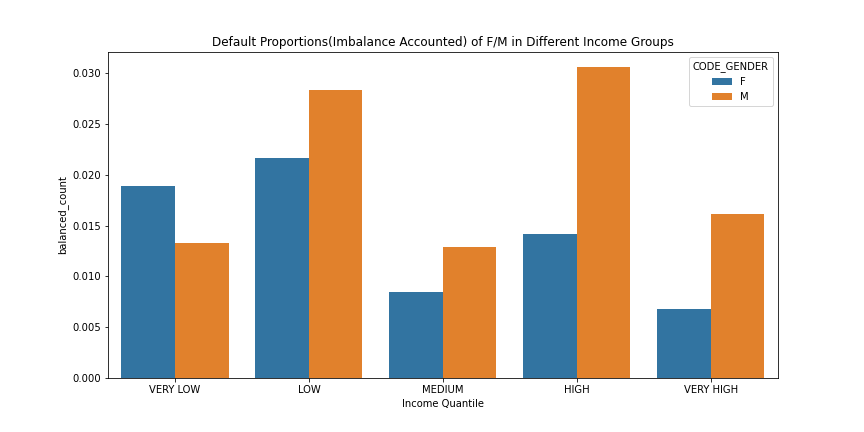

In [8]:
Image("output/balanced_plot.png")

**Observations:** 
* We now see that, indeed, males seem to have a overall higher rate of default, and this is especially the case in higher income groups, as the gap keeps increasing with income and doubles in the two highest income groups. This is a very interesting observation and further studies might be conducted on this in the future to explore what exactly is contributing to this observation. 

### Loan Type

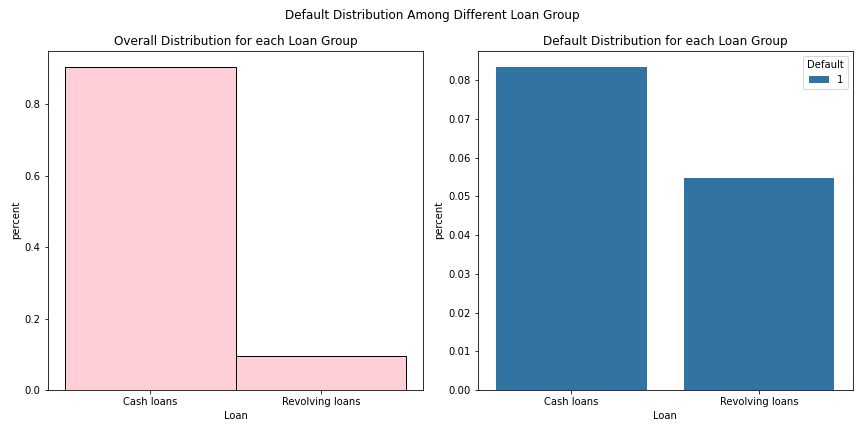

In [9]:
Image("output/Loan.png")

**Observations:** 
* People who take out cash loans have a slightly higher rate of defaulting compared to revolving loans

### Income Type

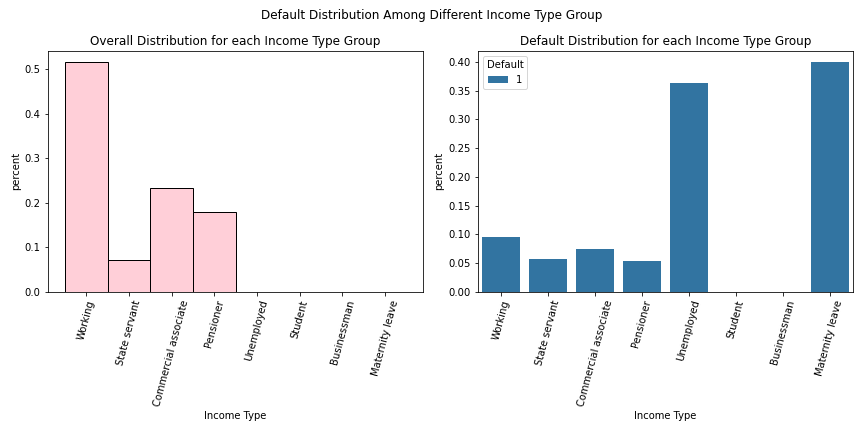

In [10]:
Image("output/Income Type.png")

**Observations:** 
* Unemployed and Maternity leave groups seem to have a much higher proportion of default, whereas state servents and pensioners tend to have a lower proportion of defaults among them.

### Education Type

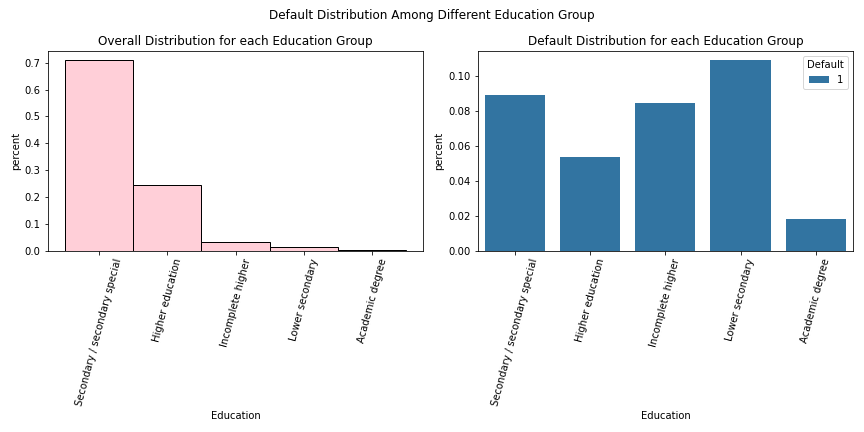

In [11]:
Image("output/Education.png")

**Observations:** 
* The academic degree and higher education group have a lower proportion of defaults compared to the other groups that are slightly lower in educational degree status

### House Ownership

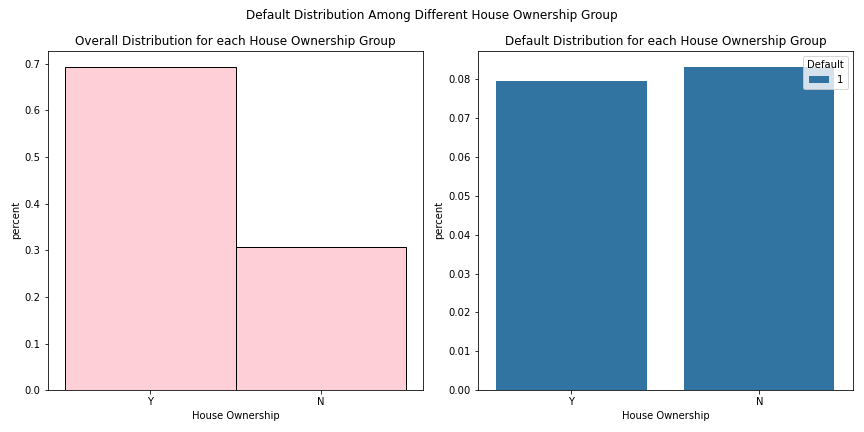

In [12]:
Image("output/House Ownership.png")

**Observations:** 
* Whether someone owns a house or not does not change significantly the rates of defaulting on a loan

### House Type

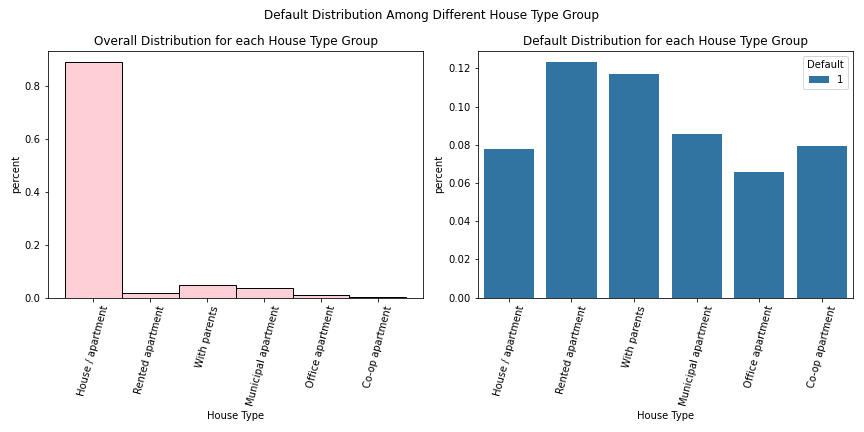

In [13]:
Image("output/House Type.png")

**Observations:** 
* Despite significant class imbalance where the vast majority of people have a home/apartment, the highest rates of defaulting in the house type category are those who live in a rented apartment. Higher default rates are also seen for those that live with their parents. 

### Number of Surrounding 30DPD Defaults

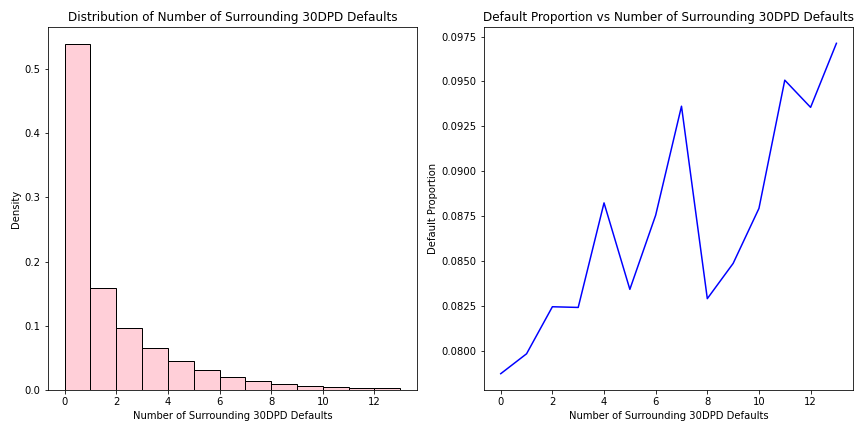

In [14]:
Image("output/Number of Surrounding 30DPD Defaults.png")

**Observations:** 
* With the increase in the number of surrounding 30day default cases, we also see a general increase in default proportion. 

### Number of Family Members

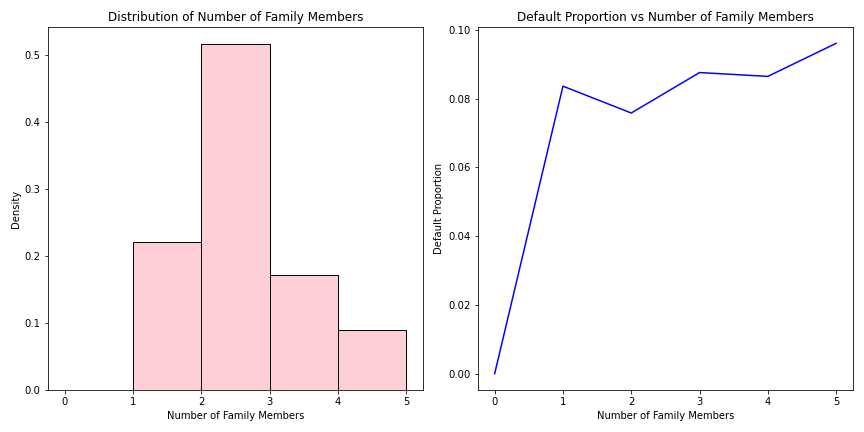

In [15]:
Image("output/Number of Family Members.png")

**Observations:** 
* With the increase in the number of family numbers, we also see a slight upward trend in default proportion. 

*Note that we did remove the extreme outliers on the right end for the above two discrete data plotting in order to achieve better visualization clarity, and future work might include more detailed analysis on the outliers.

### Some Data Takeaways

The plots above give a clear picture about the type of people within the data. The majority of people are working, female, own a home, are living in a home/apartment, and have 0 surrounding 30DPD defaults. It can also be seen that the max education for the majority of people in the data is a secondary education, which in the USA, refers to completing high school. It is interesting to see just how many people in the data own an apartment or house as it is significantly higher than for example the number of people renting. With that said, the data population really is not representative of the overall population as a whole. 

## Logistic Regression Model

The modeling section focuses on building a logistic regression model to try and predict whether someone will default on a loan or not given particular parameters from the data. As seens in the previous section, there is significant class imbalance where the vast majority of people in the data do not default on their loan. Thus metrics such as recall and precision are more important tools to determine the validity of our model compared to accuracy.

### Feature Selection and Modeling

Here we pick our features and also create dummy variables for the categorical features.

In [16]:
Features = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                   'FLAG_OWN_CAR','NAME_FAMILY_STATUS','OBS_30_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS',
                  'FLAG_OWN_REALTY']

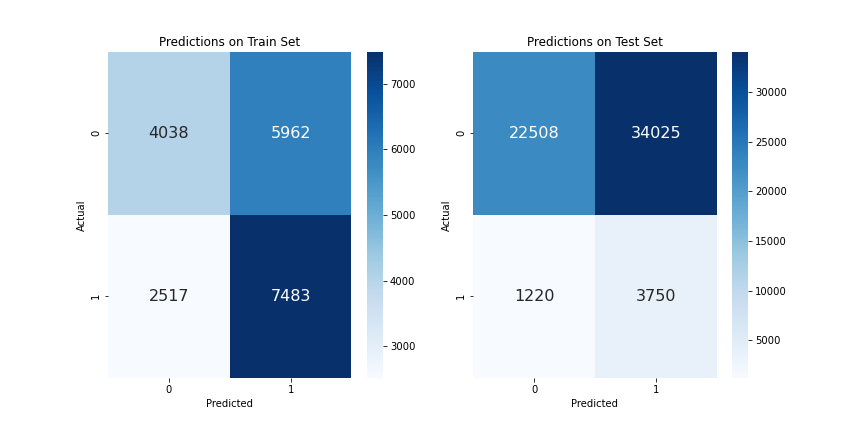

In [17]:
Image("output/reg_matrix.png")

train_precision = 0.5565637783562662 vs test_precision = 0.09927200529450694

train_recall = 0.7483 vs test_recall = 0.7545271629778671

### Results

To account for the class imbalance, a very important characteristic of our data that could significantly affect our model predictions, we tried to balance the training set through random undersampling of the 0 group and also adjusting the threshold to a point where we have high recall while maintaining a normal precision. We especially want higher recall since in reality, we would want to mark, ideally, everyone who is actually going to default, and recall penalized false negatives, giving us this ideal prediction. We also would not worry about marking someone suspicious and likely to default, because in reality these false positives will be easy to clear out by providing addition supplementary materials, like bank statements, credit rating scores, etc. Note that while both the training and test sets have a relative high recall, the precision is very low on the test set, mainly because the test set is not manually balanced and retains this trait of highly imbalanced classes from the original data. 

We can also take a look at the coefficients and have an idea of which features contributes the most to predicting default risk:

In [19]:
pd.read_feather("output/coef.fth").head()

,index,feature,coeff
0,13,NAME_INCOME_TYPE_Unemployed,2.971938
1,9,NAME_INCOME_TYPE_Maternity leave,1.005744
2,18,NAME_EDUCATION_TYPE_Lower secondary,0.769081
3,19,NAME_EDUCATION_TYPE_Secondary / secondary special,0.329509
4,27,NAME_FAMILY_STATUS_Single / not married,0.261468


## Conclusions

Throughout our EDA, we were able to find some very interesting relations on how default ratios differed in different groups. By looking at the coefficients from our simple logistic regression model, we were also able to confirm many of the relationships we discovered in the distribution and proportion plots. From what we have created, some major influencers of credit risks include being unemployed, on maternity leave, or having lower education status. We also visualized and found out that there are differences in default proportions among genders, and that judging by our data, male seems to have more default rate, especially in high income brackets.

While we think the results especially for the gender and income are quite convincing and also intuitive, we have to acknoledge that this is just a simple EDA and is far from sufficient if we want to establish stronger relationship such as causation. Throughout our notebook we also noted ideas suitable for future, more in-depth analysis, and our reproducibility efforts put in for this research will, ideally, enable future work to be easily built upon the current analysis and results.

## Authors Contribution

Joe: Joe added to Uma's initial version of EDA, serialized the data and intermediate results, created the functions(plotting and logistic regression) and the tools packages, added docstrings and tests for the functions and also wrote texts on the methods and analysis for the notebook.

Uma: Uma began the EDA and wrote the backup code towards the end(deleted for cleanness of the final versions but can be found on earlier versions of the notebook). She also wrote the initial code for the logistic regression modeling as well as set up the binder link.

Isaac: Isaac created the environment fiels as well as initiated the building of the hw7_tools library and the inital tests. He also turned the repo into a jupyter-book that can be viewed on GitHub Pages. 

**Overall the three members collaborated and contributed with equal efforts.**